## This section starts us off (api query and processing) 
* This section loops through 5 dates and gets the hrly temp, humidity and wind_speed for 5 days

In [1]:
'''
The new goal of my project is to: calculate the average temp in manchester over the last 5 days and graph it
'''
# unix time calculator -0> https://www.vultr.com/resources/unix-time-calculator/?convert=date&date_day=27&date_month=10&date_year=2021&date_hour=12&date_minute=00&date_second=00&date_tz_from=UTC&date_tz_to=UTC&date_format=Y-m-d+H%3Ai%3As

import requests, json, datetime, pandas as pd

df_final = pd.DataFrame(columns=['dt', 'temp', 'humidity', 'wind_speed']) # inititalisation of final dataframe
last_5_days = []

for x in range(0,5): # gets current date and time delta in unixtime
    unix_date_time = (datetime.datetime.today() - datetime.timedelta(x)).strftime("%s") 
    last_5_days.append(unix_date_time)




### Manchester dataframe processing

* this gets all the data for the city of manchester, condences it to what we care about and puts it in a dataframe

In [2]:
df_final_manchester = pd.DataFrame(columns=['dt', 'temp', 'humidity', 'wind_speed']) # inititalisation of final dataframe

for day in last_5_days: # gets the json from the api, processes it into a df and appends it to the final frame. ownly takes 4 columbs
    response_manchester = requests.get("http://api.openweathermap.org/data/2.5/onecall/timemachine?lat=42.9956&lon=-71.4548&dt="+ day +"&appid=fd3ef9b217de69f13fde1bd0325da289")
    
    processed_responce_manchester = response_manchester.json() # gets json
    
    df_raw_manchester = pd.DataFrame(processed_responce_manchester['hourly']) # json -> df from the "hourly" list
    
    df_processed_manchester = df_raw_manchester[["dt","temp", "humidity", "wind_speed"]].copy() # cuts df down to what we want ownly
    
    df_final_manchester = df_final_manchester.append(df_processed_manchester) # appends to the final df

df_final_manchester.insert(loc=len(df_final_manchester.columns), column='city', value='Manchester')

df_final_manchester['id'] = df_final_manchester[['dt', 'temp', 'humidity', 'wind_speed',]].sum(axis=1).map(hash)

df_final_manchester#.shape 

,dt,temp,humidity,wind_speed,city,id
0,1638057600,272.04,55,5.14,Manchester,415051897228150732
1,1638061200,272.04,55,4.12,Manchester,368934531268531675
2,1638064800,271.04,54,3.09,Manchester,299759306962822120
3,1638068400,271.04,54,3.60,Manchester,1475739219671577080
4,1638072000,271.04,54,2.06,Manchester,230584082657116167
...,...,...,...,...,...,...
19,1637780400,277.40,34,3.13,Manchester,1222097280306154730
20,1637784000,277.09,35,2.68,Manchester,1775499074751863546
21,1637787600,276.13,37,2.24,Manchester,853162200919877899
22,1637791200,274.35,42,0.45,Manchester,1844674299057583900


### Concord data processing

* this gets all the data for the city of concord, condences it to what we care about and puts it in a dataframe

In [3]:
df_final_concord = pd.DataFrame(columns=['dt', 'temp', 'humidity', 'wind_speed']) # inititalisation of final dataframe

for day in last_5_days: # gets the json from the api, processes it into a df and appends it to the final frame. ownly takes 4 columbs
    response_concord = requests.get("http://api.openweathermap.org/data/2.5/onecall/timemachine?lat=43.2081&lon=-71.5376&dt="+ day +"&appid=fd3ef9b217de69f13fde1bd0325da289")
    
    processed_responce_concord = response_concord.json() # gets json
    
    df_raw_concord = pd.DataFrame(processed_responce_concord['hourly']) # json -> df from the "hourly" list
    
    df_processed_concord = df_raw_concord[["dt","temp", "humidity", "wind_speed"]].copy() # cuts df down to what we want ownly
    
    df_final_concord = df_final_concord.append(df_processed_concord) # appends to the final df

df_final_concord.insert(loc=len(df_final_concord.columns), column='city', value='Concord')

df_final_concord['id'] = df_final_concord[['dt', 'temp', 'humidity', 'wind_speed',]].sum(axis=1).map(hash)

df_final_concord #.shape 

,dt,temp,humidity,wind_speed,city,id
0,1638057600,271.34,59,4.63,Concord,2236667786546038734
1,1638061200,270.34,63,3.09,Concord,991512099775763936
2,1638064800,270.34,63,4.12,Concord,1060687324081480689
3,1638068400,270.34,63,5.66,Concord,1638068739
4,1638072000,269.34,63,5.14,Concord,1106804690041110545
...,...,...,...,...,...,...
19,1637780400,277.10,37,6.69,Concord,1821615890955668720
20,1637784000,277.17,36,5.14,Concord,714811752308447998
21,1637787600,276.04,37,6.17,Concord,484227121533593871
22,1637791200,274.68,41,3.60,Concord,645635978246928159


## Keen data processing
* this gets all the data for the city of concord, condences it to what we care about and puts it in a dataframe

In [4]:
df_final_keen = pd.DataFrame(columns=['dt', 'temp', 'humidity', 'wind_speed']) # inititalisation of final dataframe

for day in last_5_days: # gets the json from the api, processes it into a df and appends it to the final frame. ownly takes 4 columbs
    response_keen = requests.get("http://api.openweathermap.org/data/2.5/onecall/timemachine?lat=41.5929&lon=-75.3738&dt="+ day +"&appid=fd3ef9b217de69f13fde1bd0325da289")
    
    processed_responce_keen = response_keen.json() # gets json
    
    df_raw_keen = pd.DataFrame(processed_responce_keen['hourly']) # json -> df from the "hourly" list
    
    df_processed_keen = df_raw_keen[["dt","temp", "humidity", "wind_speed"]].copy() # cuts df down to what we want ownly
    
    df_final_keen = df_final_keen.append(df_processed_keen) # appends to the final df

df_final_keen.insert(loc=len(df_final_keen.columns), column='city', value='keen')

#df_final_keen['id'].apply(lambda x : df_final_keen[x] = hash)

#df['a'] = df['a'].apply(lambda x: x + 1)

df_final_keen['id'] = df_final_keen[['dt', 'temp', 'humidity', 'wind_speed',]].sum(axis=1).map(hash)



df_final_keen #.shape

,dt,temp,humidity,wind_speed,city,id
0,1638057600,270.44,74,2.22,keen,1521856585631188954
1,1638061200,269.44,72,1.92,keen,830103792818247143
2,1638064800,268.44,73,1.47,keen,2098317337934619638
3,1638068400,269.44,72,1.30,keen,1706323850446434822
4,1638072000,270.44,68,1.39,keen,1913850073119391763
...,...,...,...,...,...,...
19,1637780400,278.04,56,2.54,keen,1337388771059862784
20,1637784000,277.78,57,1.87,keen,1498797627773197072
21,1637787600,276.68,59,1.26,keen,2167492562240055584
22,1637791200,274.67,67,1.28,keen,2190550970341963574


### This section merged the 3 newly ceated data frames

In [5]:
df_big = pd.concat([df_final_manchester, df_final_keen, df_final_concord], axis=0)
df_big

,dt,temp,humidity,wind_speed,city,id
0,1638057600,272.04,55,5.14,Manchester,415051897228150732
1,1638061200,272.04,55,4.12,Manchester,368934531268531675
2,1638064800,271.04,54,3.09,Manchester,299759306962822120
3,1638068400,271.04,54,3.60,Manchester,1475739219671577080
4,1638072000,271.04,54,2.06,Manchester,230584082657116167
...,...,...,...,...,...,...
19,1637780400,277.10,37,6.69,Concord,1821615890955668720
20,1637784000,277.17,36,5.14,Concord,714811752308447998
21,1637787600,276.04,37,6.17,Concord,484227121533593871
22,1637791200,274.68,41,3.60,Concord,645635978246928159


## this sends df_final to a csv file
* thats it, its just a csv file

In [6]:
df_big.to_csv(r'/home/anthony/Documents/programing-materals/comp574/DataProject/export_dataframe.csv', index = False, header=True)

#### converts the temp into ferinheit and  dt into a readable date in place of a unix time stamp

In [7]:
df_big.loc[:, "temp"] = df_big["temp"].apply(lambda x: x - 273)
df_big.loc[:, "dt"] = df_big["dt"].apply(lambda x: datetime.datetime.utcfromtimestamp(x).strftime('%m/%d/%Y'))
df_big

#datetime.datetime.utcfromtimestamp(posix_time).strftime('%Y-%m-%dT%H:%M:%SZ')

,dt,temp,humidity,wind_speed,city,id
0,11/28/2021,-0.96,55,5.14,Manchester,415051897228150732
1,11/28/2021,-0.96,55,4.12,Manchester,368934531268531675
2,11/28/2021,-1.96,54,3.09,Manchester,299759306962822120
3,11/28/2021,-1.96,54,3.60,Manchester,1475739219671577080
4,11/28/2021,-1.96,54,2.06,Manchester,230584082657116167
...,...,...,...,...,...,...
19,11/24/2021,4.10,37,6.69,Concord,1821615890955668720
20,11/24/2021,4.17,36,5.14,Concord,714811752308447998
21,11/24/2021,3.04,37,6.17,Concord,484227121533593871
22,11/24/2021,1.68,41,3.60,Concord,645635978246928159


## This sectoin handles averaging the columbs

#### Avearge Temp

In [8]:
aveage_temp = df_big.groupby('city')['temp'].mean()
aveage_temp # this needs to be converted to regular temp

city
Concord       1.302376
Manchester    1.733861
keen          0.169010
Name: temp, dtype: float64

### temp variance

In [9]:
aveage_temp_var = df_big.groupby('city')['temp'].var()
aveage_temp_var

city
Concord       12.895984
Manchester    14.000148
keen           9.887789
Name: temp, dtype: float64

#### Average humidity

In [10]:
average_humidity = df_big.groupby('city')['humidity'].mean()
average_humidity

city
Concord       68.079208
Manchester    64.712871
keen          78.693069
Name: humidity, dtype: float64

#### Average wind speed

In [11]:
aveage_wind_speed = df_big.groupby('city')['wind_speed'].mean()
aveage_wind_speed # This is in MPH already, its just so slow that its under 1 mph

city
Concord       3.584059
Manchester    2.634059
keen          3.398119
Name: wind_speed, dtype: float64

#### city mode

In [12]:
city_mode = df_big['city'].mode()
city_mode

0       Concord
1    Manchester
2          keen
dtype: object

### graphing section

In [13]:
import seaborn as sns

<AxesSubplot:>

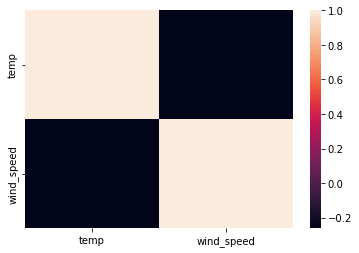

In [14]:
graphdf = (df_big.drop(['dt', 'city', 'id'], axis=1).copy())

corr = graphdf.corr()
sns.heatmap(corr)

In [15]:
bar_graph = (df_big.drop(['dt','id'], axis=1).copy())
bar_graph


,temp,humidity,wind_speed,city
0,-0.96,55,5.14,Manchester
1,-0.96,55,4.12,Manchester
2,-1.96,54,3.09,Manchester
3,-1.96,54,3.60,Manchester
4,-1.96,54,2.06,Manchester
...,...,...,...,...
19,4.10,37,6.69,Concord
20,4.17,36,5.14,Concord
21,3.04,37,6.17,Concord
22,1.68,41,3.60,Concord


<AxesSubplot:xlabel='city', ylabel='average_temp'>

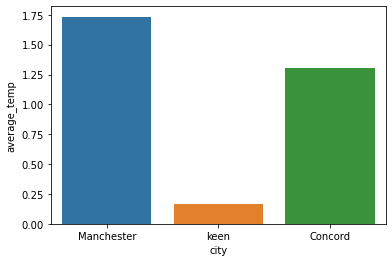

In [34]:

manchester_bar = bar_graph.where(bar_graph['city'] == 'Manchester')
manchester_bar.dropna()
mancheser_mean = manchester_bar['temp'].mean()


keen_bar = bar_graph.where(bar_graph['city'] == 'keen')
keen_bar.dropna()
keen_mean = keen_bar['temp'].mean()

Concord_bar = bar_graph.where(bar_graph['city'] == 'Concord')
Concord_bar.dropna()
Concord_mean = Concord_bar['temp'].mean()

data = {'city': ['Manchester', 'keen', 'Concord'], 'average_temp': [mancheser_mean, keen_mean, Concord_mean]}

df = pd.DataFrame(data)

sns.barplot(x = 'city', y = 'average_temp', data=df)

In [17]:

# compair average temps via bar graph.

# use the larg graph to do a heat map to see if any of the data is corilated